<a href="https://colab.research.google.com/github/sergey-jr/F19-20_ML/blob/master/Lab_midterm_Sergei_Bakaleinik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

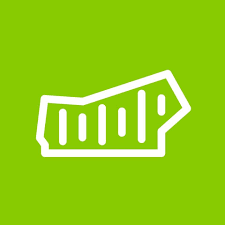


# Advanced Machine Learning
# Professor: Muhammad Fahim
## Teaching Assistant: BEKKOUCH Imad Eddine Ibrahim

## Innopolis University 
### Week 6: Midterm Exam
1. Image Classification
    1. TODO1
    2. TODO2


# 1. Image Classification




## The Dataset


1. CIFAR-10 dataset

![alt text](https://miro.medium.com/max/944/1*6XQqOifwnmplS22zCRRVaw.png)


The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.




### Dataset Loading

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.optim as optim

## TODO 1: Transorfms


1.   Create the transforms:
    *   Resize the image into 32*32
    *   perform a random rotation of 90 degrees
    *   Normalize the pixels to $\mu= 0.5 , \sigma = 0.5$ for every channel


Hint: data augmentation techniques shouldn't be applied to the test dataset.




In [ ]:
%%html
<marquee style='width: 30%; color: red;'><b>TODO: 1!</b></marquee>

In [ ]:
#TODO 1
img_size = 32
train_transforms = transforms.Compose([
                                       transforms.Resize(img_size), 
                                       transforms.ToTensor(), 
                                       transforms.Normalize([0.5], [0.5])
                                       ])
test_tranforms = transforms.Compose([
                                     transforms.Resize(img_size),
                                     transforms.RandomRotation(90),
                                     transforms.ToTensor(),
                                     transforms.Normalize([0.5], [0.5])
                                       ])


trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=train_transforms)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=1)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=test_tranforms)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=1)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


  car plane  bird horse


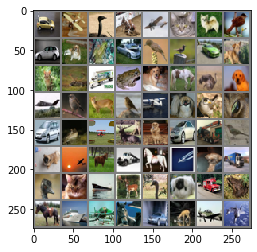

In [ ]:
def to_img(x):
    x = 0.5 * (x + 1)
    x = x.clamp(0, 1)
    x = x.view(x.size(0), 3, 32, 32)
    return x


import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assume that we are on a CUDA machine, then this should print a CUDA device:

print(device)

cuda:0


### Model Building

## TODO 2: model (Conv+FCNN)


1.   Create the conv encoder:
    *   layer1 : 2 kernels, 3*3 kernel size, stride 1.
    *   layer2 : 4 kernels, 5*5 kernel size, stride 2.
    *   layer3 : 8 kernels, 3*3 kernel size, stride 1.
    *   layer4 : 16 kernels, 5*5 kernel size, stride 2.
    *   layer5 : 32 kernels, 3*3 kernel size, stride 1.
    *   add an activation function of your own choice after every layer.
2.   Create the classifier:
    *   layer1 : 64 output-neurons with a rely activation.
    *   layer2 : this is the final layer with no activation function.





In [ ]:
%%html
<marquee style='width: 30%; color: red;'><b>TODO: 2!</b></marquee>

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        #TODO
        self.encoder = nn.Sequential(
            # layer1 : 2 kernels, 3*3 kernel size, stride 1.
            nn.Conv2d(3, 2, 3, 1),
            nn.ReLU(), 
            # layer2 : 4 kernels, 5*5 kernel size, stride 2.
            nn.Conv2d(2, 4, 5, 2),
            nn.ReLU(),
            # layer3 : 8 kernels, 3*3 kernel size, stride 1.
            nn.Conv2d(4, 8, 3, 1),
            nn.ReLU(), 
            # layer4 : 16 kernels, 5*5 kernel size, stride 2.
            nn.Conv2d(8, 16, 5, 2),
            nn.ReLU(), 
            # layer5 : 32 kernels, 3*3 kernel size, stride 1. 
            nn.Conv2d(16, 32, 3, 1),
            nn.ReLU(), 
        )
        #TODO
        self.classifier = nn.Sequential(
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = x.view(x.shape[0], -1)
        x = self.classifier(x)
        return x


net = Net()
net = net.to(device)


#hyper parameters 

nb_epoch = 20
lr = 0.001
optimizer = optim.Adam(net.parameters(), lr=lr) #optim.SGD(net.parameters(), lr=lr, momentum=0.9)

In [ ]:
def train(net,trainloader,optimizer):
    criterion = nn.CrossEntropyLoss()
    for epoch in range(nb_epoch):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if (i+1) % 500 == 0:    # print every 500 mini-batches
                print('[%d, %5d] loss: %.3f' %
                    (epoch + 1, i + 1, running_loss / 500))
                running_loss = 0.0

    print('Finished Training')

In [ ]:
def visualize(net,testloader):
    dataiter = iter(testloader)
    images, labels = dataiter.next()
    # print images
    imshow(torchvision.utils.make_grid(images))
    plt.show()
    print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
    images, labels = images.to(device), labels.to(device)
    outputs = net(images).cuda()
    _, predicted = torch.max(outputs, 1)

    print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                                for j in range(4)))

In [ ]:
def accuracy(net,testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (
        100 * correct / total))

In [ ]:
def per_class_accuracy(net,testloader):
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            for i in range(4):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1


    for i in range(10):
        print('Accuracy of %5s : %2d %%' % (
            classes[i], 100 * class_correct[i] / class_total[i]))

In [ ]:
def train_evaluate(net):
    
    train(net,trainloader,optimizer)
    visualize(net,testloader)
    accuracy(net,testloader)
    per_class_accuracy(net,testloader)

[1,   500] loss: 1.969
[2,   500] loss: 1.671
[3,   500] loss: 1.569
[4,   500] loss: 1.506
[5,   500] loss: 1.472
[6,   500] loss: 1.434
[7,   500] loss: 1.401
[8,   500] loss: 1.374
[9,   500] loss: 1.354
[10,   500] loss: 1.333
[11,   500] loss: 1.315
[12,   500] loss: 1.283
[13,   500] loss: 1.278
[14,   500] loss: 1.249
[15,   500] loss: 1.241
[16,   500] loss: 1.220
[17,   500] loss: 1.203
[18,   500] loss: 1.214
[19,   500] loss: 1.189
[20,   500] loss: 1.188
Finished Training


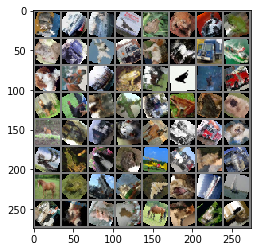

GroundTruth:    cat  ship  ship plane
Predicted:    cat truck   dog plane
Accuracy of the network on the 10000 test images: 32 %
Accuracy of plane : 23 %
Accuracy of   car : 20 %
Accuracy of  bird : 27 %
Accuracy of   cat : 36 %
Accuracy of  deer : 12 %
Accuracy of   dog : 25 %
Accuracy of  frog : 58 %
Accuracy of horse : 10 %
Accuracy of  ship : 24 %
Accuracy of truck : 38 %


In [ ]:
train_evaluate(net)